In [1]:
# importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
# understanding the datset
boston=load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#ACCESS THE ATTRIBUTES
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index, name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [8]:
# reshaping data
data=dataset[:,12].reshape(-1,1)

In [9]:
#shape of the data
np.shape(dataset)

(506, 13)

In [10]:
#target values
target=boston.target.reshape(-1,1)

In [11]:
#shape of the target
np.shape(target)

(506, 1)

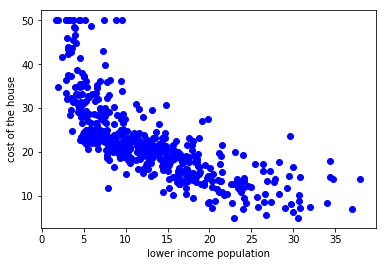

In [12]:
#ensuring matplotlib is working inside the notebook
%matplotlib inline
plt.scatter(data, target, color='blue')
plt.xlabel('lower income population')
plt.ylabel('cost of the house')
plt.show()

In [13]:
# regression
from sklearn.linear_model import LinearRegression

# creating a regression model
reg=LinearRegression()

#fit the model
reg.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# prediction
pred=reg.predict(data)

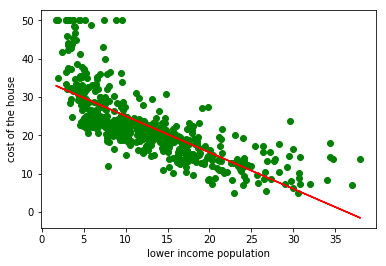

In [16]:
%matplotlib inline
plt.scatter(data, target, color='green')
plt.plot(data, pred, color='red')
plt.xlabel('lower income population')
plt.ylabel('cost of the house')
plt.show()

In [17]:
# regression
from sklearn.linear_model import Lasso

# creating a regression model
reg=Lasso()

#fit the model
reg.fit(data, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
# prediction
pred=reg.predict(data)

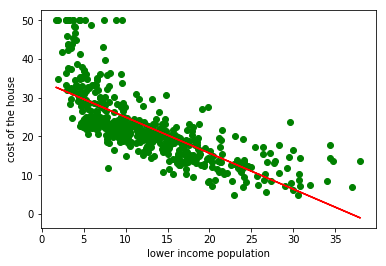

In [19]:
%matplotlib inline
plt.scatter(data, target, color='green')
plt.plot(data, pred, color='red')
plt.xlabel('lower income population')
plt.ylabel('cost of the house')
plt.show()

In [22]:
# circumventing curve issue using polynomial model
from sklearn.preprocessing import PolynomialFeatures

# to allow merging of models
from sklearn.pipeline import make_pipeline

In [38]:
model = make_pipeline(PolynomialFeatures(3),reg)


In [39]:
model.fit(data, target)

/mnt/disks/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=22, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [36]:
pred=model.predict(data)

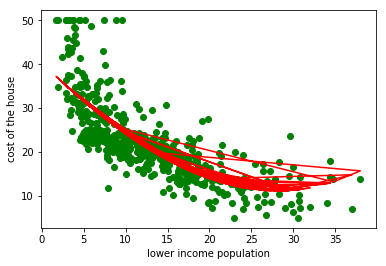

In [41]:
%matplotlib inline
plt.scatter(data, target, color='green')
plt.plot(data, pred, color='red')
plt.xlabel('lower income population')
plt.ylabel('cost of the house')
plt.show()

In [44]:
# r_2 metric
from sklearn.metrics import r2_score

In [45]:
# predict
r2_score(pred,target)


0.3750357641306533